In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X = pd.read_csv("Linear_X_Train.csv").values
Y = pd.read_csv("Linear_Y_Train.csv").values

In [5]:
mu = X.mean()
sigma = X.std()

In [6]:
X = (X-mu)/sigma

In [7]:
print(X.mean(),X.std())

3.789561257387201e-18 1.0


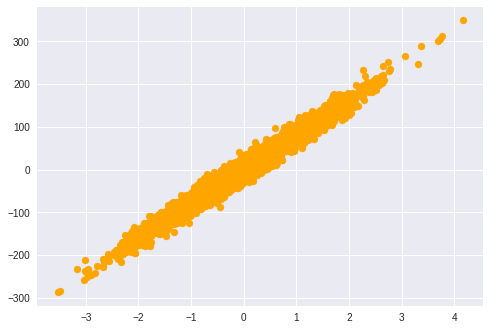

In [10]:
plt.style.use("seaborn")
plt.scatter(X,Y,color="orange")
plt.show()

In [11]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [12]:
def error(X,Y,theta):
    
    e = 0
    m = X.shape[0]
    
    for i in range(m):
        
        y_ = hypothesis(X[i],theta)
        e += (y_-Y[i])**2
    
    return e/m

In [13]:
def gradient(X,Y,theta):
    
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        
        y_ = hypothesis(X[i],theta)
        grad[0] += (y_-Y[i])
        grad[1] += (y_-Y[i])*X[i]
        
    return grad/m   

In [16]:
def gradient_descent(X,Y,lr=0.1,max_itr=100):
    
    err_list = []
    theta = np.zeros((2,))
    for i in range(max_itr):
        
        e = error(X,Y,theta)
        err_list.append(e)
        
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta,err_list    

In [17]:
theta,err_list = gradient_descent(X,Y)

In [18]:
print(theta)

[ 0.6838508  79.90361453]


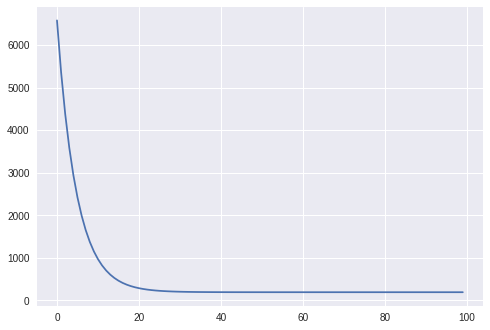

In [19]:
plt.plot(err_list)
plt.show()